In [387]:
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA, KernelPCA
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn import manifold, datasets
from numpy.random import RandomState
from matplotlib import ticker
import numpy as np
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

Kernel PCA, PCA, ISOMAP, LDA

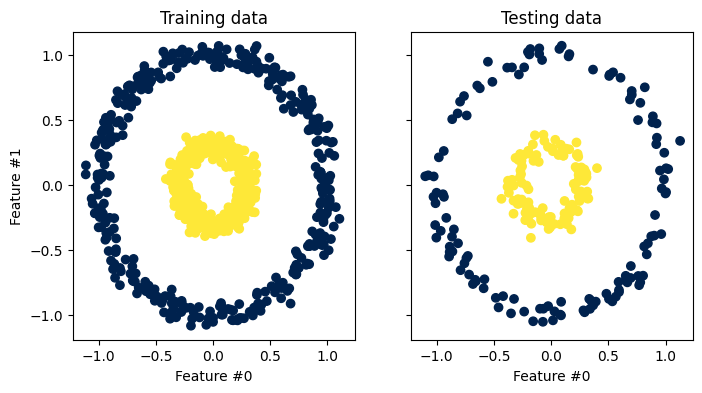

In [388]:
X, y = make_circles(n_samples=1_000, factor=0.3, noise=0.05, random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=0)

_, (train_ax, test_ax) = plt.subplots(ncols=2, sharex=True, sharey=True, figsize=(8, 4))

n_neighbors = 12
n_components = 2
#change color of plot
train_ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='cividis')
train_ax.set_ylabel("Feature #1")
train_ax.set_xlabel("Feature #0")
train_ax.set_title("Training data")

test_ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='cividis')
#test_ax.set_facecolor('pink')
test_ax.set_xlabel("Feature #0")
_ = test_ax.set_title("Testing data")


In [389]:
pca = PCA(n_components=2)
kernel_pca = KernelPCA(
    n_components=None, kernel="rbf", gamma=10, fit_inverse_transform=True, alpha=0.1
)

X_test_pca = pca.fit(X_train).transform(X_test)
X_test_kernel_pca = kernel_pca.fit(X_train).transform(X_test)

isomap = manifold.Isomap(n_neighbors=n_neighbors, n_components=n_components, p=1)
S_isomap = isomap.fit_transform(X_test)

lda = LinearDiscriminantAnalysis(n_components=1)
X_test_lda = lda.fit(X_train, y_train).transform(X_test)


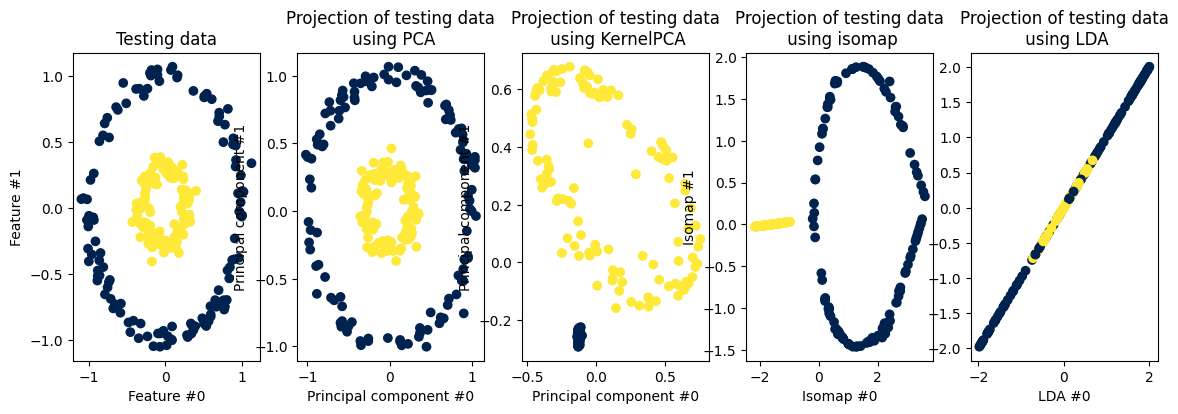

In [390]:
fig, (orig_data_ax, pca_proj_ax, kernel_pca_proj_ax, isomap_proj_ax, lda_proj_ax) = plt.subplots(
    ncols=5, figsize=(14, 4)
)

orig_data_ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='cividis')
orig_data_ax.set_ylabel("Feature #1")
orig_data_ax.set_xlabel("Feature #0")
orig_data_ax.set_title("Testing data")

pca_proj_ax.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_test, cmap='cividis')
pca_proj_ax.set_ylabel("Principal component #1")
pca_proj_ax.set_xlabel("Principal component #0")
pca_proj_ax.set_title("Projection of testing data\n using PCA")

kernel_pca_proj_ax.scatter(X_test_kernel_pca[:, 0], X_test_kernel_pca[:, 1], c=y_test, cmap='cividis')
kernel_pca_proj_ax.set_ylabel("Principal component #1")
kernel_pca_proj_ax.set_xlabel("Principal component #0")
_ = kernel_pca_proj_ax.set_title("Projection of testing data\n using KernelPCA")

isomap_proj_ax.scatter(S_isomap[:, 0], S_isomap[:, 1], c=y_test, cmap='cividis')
isomap_proj_ax.set_ylabel("Isomap #1")
isomap_proj_ax.set_xlabel("Isomap #0")
_ = isomap_proj_ax.set_title("Projection of testing data\n using isomap")

lda_proj_ax.scatter(X_test_lda[:, 0], X_test_lda[:, 0], c=y_test, cmap='cividis')
lda_proj_ax.set_xlabel("LDA #0")
_ = lda_proj_ax.set_title("Projection of testing data\n using LDA")

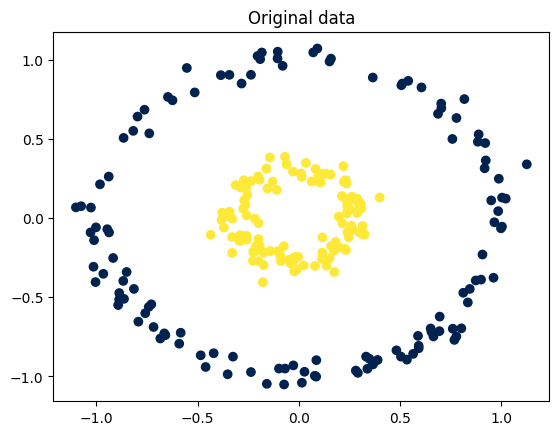

In [391]:
plt.figure()
plt.scatter(orig_data_ax.get_children()[0].get_offsets()[:, 0], orig_data_ax.get_children()[0].get_offsets()[:, 1], c=y_test, cmap='cividis')
plt.title("Original data")
plt.show()

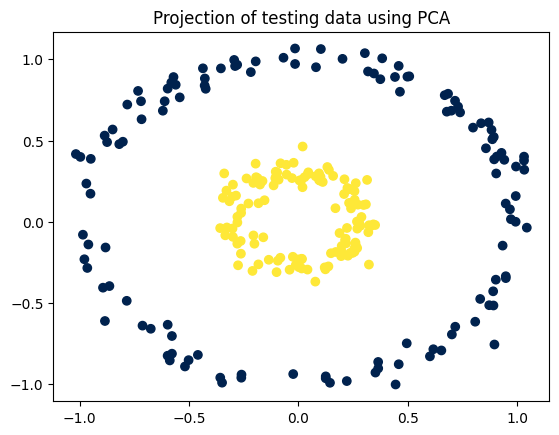

In [392]:
plt.figure()
plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_test, cmap='cividis')
plt.title("Projection of testing data using PCA")
plt.show()

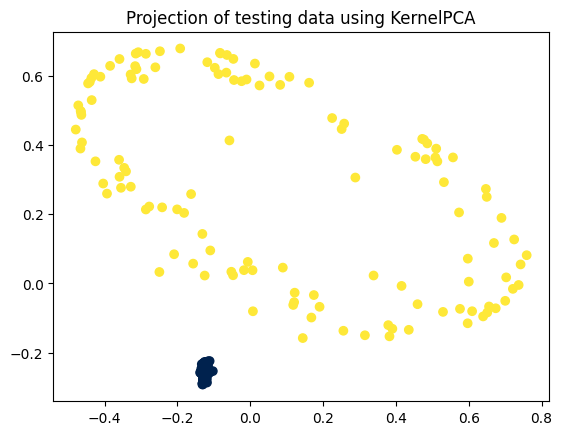

In [393]:
plt.figure()
plt.scatter(X_test_kernel_pca[:, 0], X_test_kernel_pca[:, 1], c=y_test, cmap='cividis')
plt.title("Projection of testing data using KernelPCA")
plt.show()

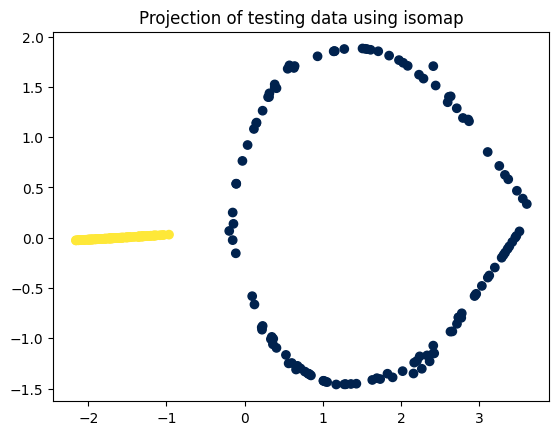

In [394]:
plt.figure()
plt.scatter(S_isomap[:, 0], S_isomap[:, 1], c=y_test, cmap='cividis')
plt.title("Projection of testing data using isomap")
plt.show()

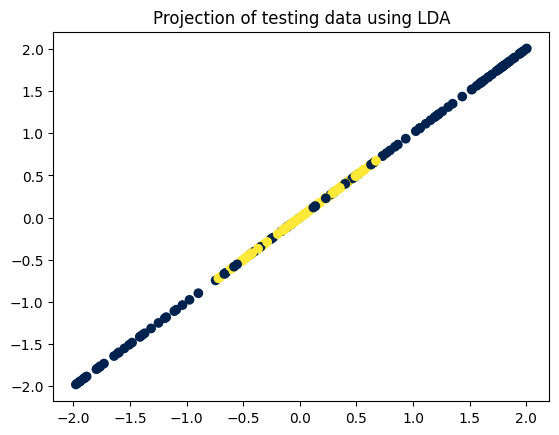

In [395]:
plt.figure()
plt.scatter(X_test_lda[:, 0], X_test_lda[:, 0], c=y_test, cmap='cividis')
plt.title("Projection of testing data using LDA")
plt.show()

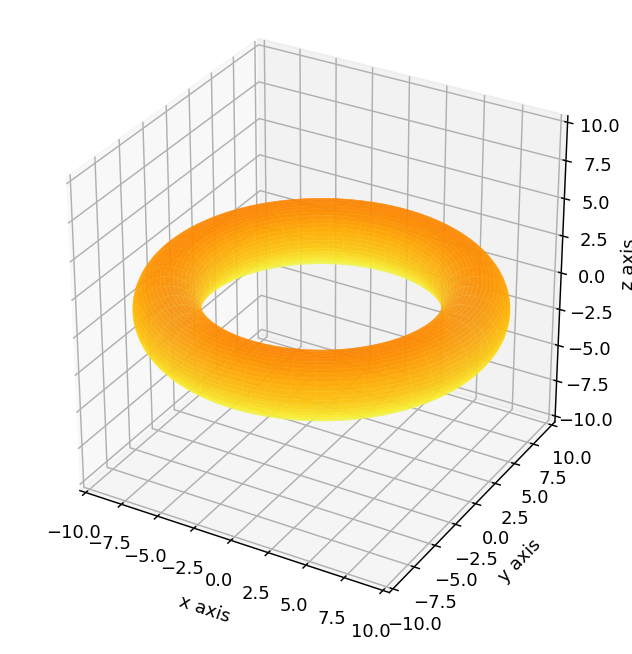

In [396]:
u=np.linspace(0,2*np.pi,100)
v=np.linspace(0,2*np.pi,100)
u,v=np.meshgrid(u,v)
a = 2
b = 9
X = (b + a*np.cos(u)) * np.cos(v)
Y = (b + a*np.cos(u)) * np.sin(v)
Z = a * np.sin(u)

fig = plt.figure(figsize=(6,6),dpi=130)
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('x axis')
ax.set_ylabel('y axis')
ax.set_zlabel('z axis')
ax.set_xlim(-10,10)
ax.set_ylim(-10,10)
ax.set_zlim(-10,10)
ax.set_box_aspect((1,1,1))

ax.plot_surface(X, Y, Z,alpha=0.8, cmap=cm.Wistia)
plt.show()